# Anomaliedetectie a.d.h.v. Twitters 'AnomalyDetection' op Gentse parkingdata

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rpy2.robjects import r, pandas2ri
from rpy2 import robjects as ro
from rpy2.robjects.conversion import localconverter

import time

### Inlezen van de data

In [3]:
parking_data = pd.read_csv('./p10.csv')
print(parking_data)

                 Timestamp  Available
0      2019-06-20 12:59:00        420
1      2019-06-20 13:14:00        425
2      2019-06-20 13:29:00        432
3      2019-06-20 13:44:00        427
4      2019-06-20 13:58:00        428
...                    ...        ...
36738  2020-07-13 17:44:00        594
36739  2020-07-13 17:54:00        594
36740  2020-07-13 18:10:00        596
36741  2020-07-13 18:29:00        595
36742  2020-07-13 18:41:00        598

[36743 rows x 2 columns]


### Twitters '*AnomalyDetection*' is geïmplementeerd in R. Om dit te runnen in python gebruiken we de package **rpy2**. Een werkende installatie van R is echter vereist. 

In [4]:
# Inladen van R library en R functie.
lib = r.library("AnomalyDetection")
anom_detect = r['ad_ts']

In [5]:
# Omzetten van Pandas DataFrame naar een R dataframe en uitvoeren van de anomaliedetectie (met tijdsmeting).
# Op deze manier wordt de output automatisch terug omgezet in een Pandas DataFrame.

start_time = time.time()

with localconverter(ro.default_converter + pandas2ri.converter):
    R_df = ro.conversion.py2rpy(parking_data)
    anoms_parking_data = anom_detect(R_df, max_anoms = 0.02, direction = "both")
    
execution_time = time.time() - start_time

In [6]:
print(f'Script executed in: {execution_time} seconds')
print('')
print(anoms_parking_data)

Script executed in: 5.571996212005615 seconds

                    timestamp  anoms
1   2019-07-20 19:59:00+00:00    164
2   2019-07-20 20:14:00+00:00    151
3   2019-07-20 20:28:00+00:00    132
4   2019-07-20 20:44:00+00:00    108
5   2019-07-20 20:59:00+00:00     82
..                        ...    ...
730 2020-03-22 10:14:00+00:00      0
731 2020-04-14 13:13:00+00:00      0
732 2020-05-12 09:58:00+00:00      0
733 2020-05-14 14:29:00+00:00      0
734 2020-05-14 22:45:00+00:00      0

[734 rows x 2 columns]


### Plotten van de data met aanduiding van de gedetecteerde anomalieën

In [9]:
# Kolom met timestamps omzetten naar DateTime types en instellen als index voor het originele DataFrame
parking_timestamp_index = parking_data.copy(deep=True)
parking_timestamp_index['Timestamp'] = pd.to_datetime(parking_timestamp_index['Timestamp'])
parking_timestamp_index = parking_timestamp_index.set_index('Timestamp')

# Timestamp bij anomalieën ook omzetten naar DateTime types
anoms_parking_data['timestamp'] = pd.to_datetime(anoms_parking_data['timestamp'])

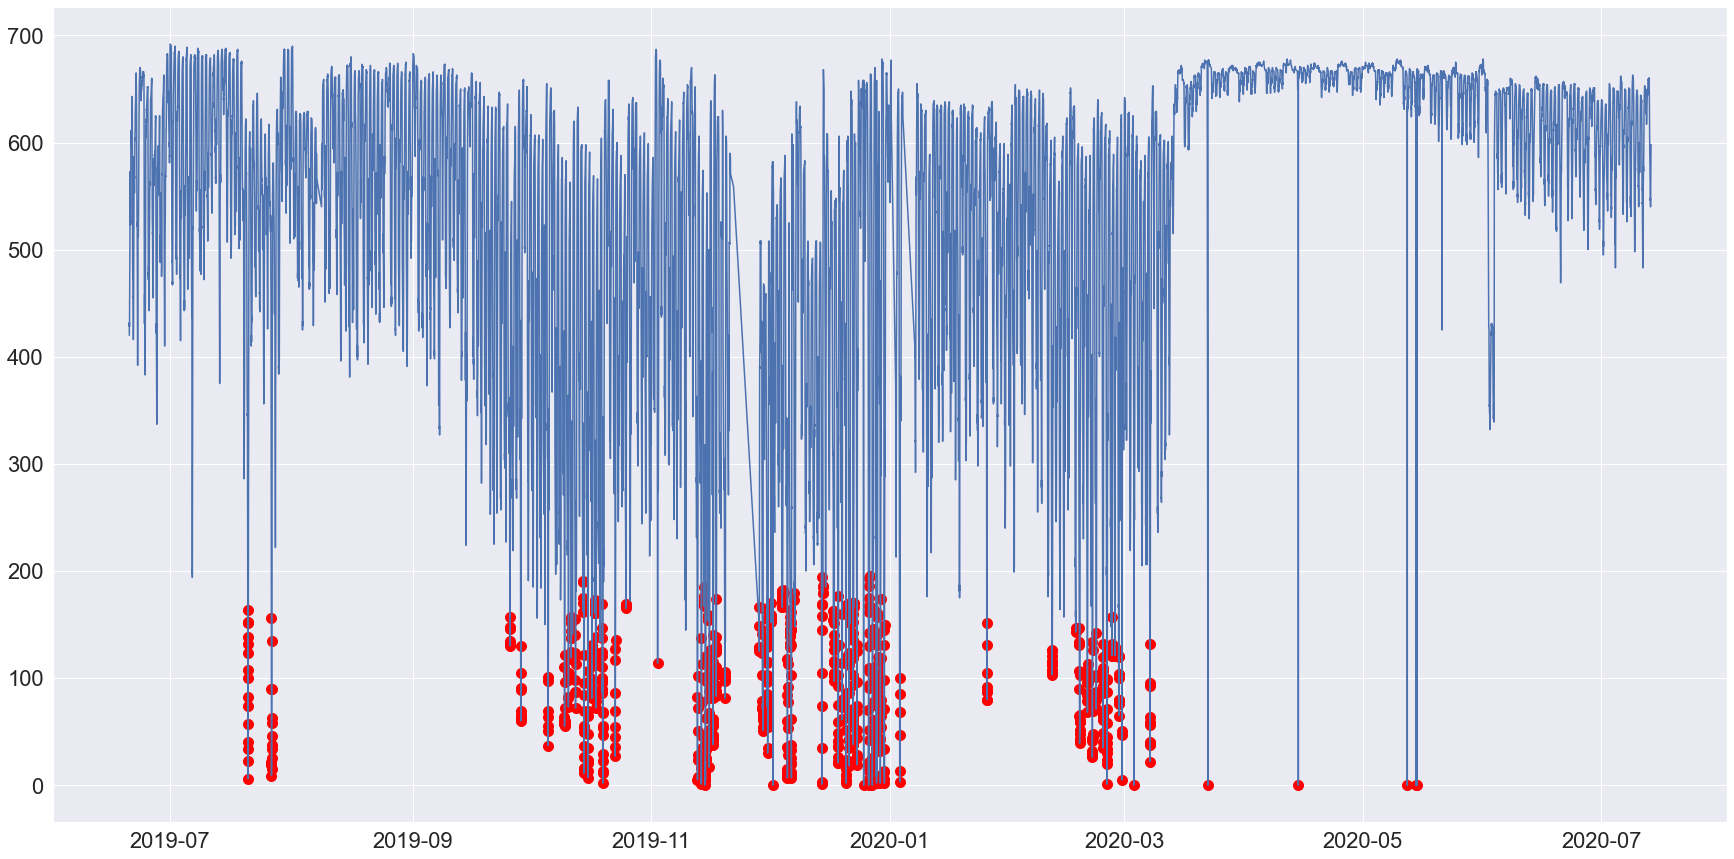

In [11]:
# Plotten van beide grafieken
sns.set(rc={'figure.figsize':(30,15)})
sns.set(font_scale=2)

plt.plot(parking_timestamp_index.index, parking_timestamp_index['Available'])
plt.scatter(anoms_parking_data['timestamp'], anoms_parking_data['anoms'], c='Red', s=100)
plt.show()

In [12]:
# Unieke dagen filteren waar anomalieën zich voordoen
unique_dates = pd.to_datetime(anoms_parking_data['timestamp'])
unique_dates = unique_dates.map(pd.Timestamp.date).unique()
print(unique_dates)

[datetime.date(2019, 7, 20) datetime.date(2019, 7, 26)
 datetime.date(2019, 7, 27) datetime.date(2019, 9, 25)
 datetime.date(2019, 9, 28) datetime.date(2019, 10, 5)
 datetime.date(2019, 10, 9) datetime.date(2019, 10, 10)
 datetime.date(2019, 10, 11) datetime.date(2019, 10, 12)
 datetime.date(2019, 10, 14) datetime.date(2019, 10, 15)
 datetime.date(2019, 10, 16) datetime.date(2019, 10, 17)
 datetime.date(2019, 10, 19) datetime.date(2019, 10, 22)
 datetime.date(2019, 10, 25) datetime.date(2019, 11, 2)
 datetime.date(2019, 11, 12) datetime.date(2019, 11, 13)
 datetime.date(2019, 11, 14) datetime.date(2019, 11, 15)
 datetime.date(2019, 11, 16) datetime.date(2019, 11, 17)
 datetime.date(2019, 11, 19) datetime.date(2019, 11, 28)
 datetime.date(2019, 11, 29) datetime.date(2019, 11, 30)
 datetime.date(2019, 12, 1) datetime.date(2019, 12, 2)
 datetime.date(2019, 12, 4) datetime.date(2019, 12, 5)
 datetime.date(2019, 12, 6) datetime.date(2019, 12, 7)
 datetime.date(2019, 12, 14) datetime.date(20